#  E-Commerce Marketing Analysis


Scenario:
You're a marketing analyst at an e-commerce company that's noticing a plateau in sales despite increased online traffic and engagement. Leadership is wondering why this is happening—and how to fix it


# 🔎 Business Question:
* "Why is high website traffic not translating into increased sales, and how can we improve conversion?"

 This question breaks into two parts:
- Identify the bottlenecks in your current customer journey.
- Recommend strategies to boost conversions.



In [32]:
import psycopg2
import pandas as pd

# Define connection parameters
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="website_data",
    user="postgres",
    password="Shane223@@"
)

# Query and load into DataFrame
query = "SELECT * FROM website_data;"
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Preview data
df.head()

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_19268\121117712.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,id,customer_behavior,market_trends,seasonal_fluctuations,product_availability,customer_demographics,website_traffic,engagement_rate,sales_forecast
0,1,54.324590,1.2,High,80,36-45,200,0.016666,95
1,2,33.448665,0.8,High,32,26-35,194,0.048364,486
2,3,66.118228,1.0,Medium,54,36-45,191,0.038420,268
3,4,38.547058,0.8,Low,30,46-60,209,0.076997,453
4,5,42.952826,1.2,Low,37,26-35,192,0.010529,265


In [33]:
#save the sql query script to a file
with open('website_data_query.sql', 'w') as file:
    file.write(query)

# Save the DataFrame to a CSV file
df.to_csv('website_data.csv', index=False)

# Data Cleaning and Preparation

In [34]:
#imort necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [35]:
# load the dataset
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df.head()

load_data(r"C:\Users\Rebecca\Desktop\Marketing trends analysis\website_data.csv")

,id,customer_behavior,market_trends,seasonal_fluctuations,product_availability,customer_demographics,website_traffic,engagement_rate,sales_forecast
0,1,54.324590,1.2,High,80,36-45,200,0.016666,95
1,2,33.448665,0.8,High,32,26-35,194,0.048364,486
2,3,66.118228,1.0,Medium,54,36-45,191,0.038420,268
3,4,38.547058,0.8,Low,30,46-60,209,0.076997,453
4,5,42.952826,1.2,Low,37,26-35,192,0.010529,265


In [36]:
#check the data types and null values
def check_data_types(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nNull Values:")
    print(df.isnull().sum())
check_data_types(df)

Data Types:
id                         int64
customer_behavior        float64
market_trends            float64
seasonal_fluctuations     object
product_availability       int64
customer_demographics     object
website_traffic            int64
engagement_rate          float64
sales_forecast             int64
dtype: object

Null Values:
id                       0
customer_behavior        0
market_trends            0
seasonal_fluctuations    0
product_availability     0
customer_demographics    0
website_traffic          0
engagement_rate          0
sales_forecast           0
dtype: int64


In [37]:
#check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    return duplicates
check_duplicates(df)

Number of duplicate rows: 0


0

In [38]:
#save cleaned data to a new CSV file
def save_cleaned_data(df, filepath):
    df.to_csv(filepath, index=False)
    print(f"Cleaned data saved to {filepath}")
save_cleaned_data(df, r"C:\Users\Rebecca\Desktop\Marketing trends analysis\cleaned_website_data.csv")

Cleaned data saved to C:\Users\Rebecca\Desktop\Marketing trends analysis\cleaned_website_data.csv


# Exploritory Data Analysis

In [39]:
# histogram for website traffic using plotly 
def plot_website_traffic(df):
    fig = px.histogram(df, x='website_traffic', title='Website Traffic Distribution')
    fig.update_layout(xaxis_title='Website Traffic', yaxis_title='Frequency')
    fig.show()
plot_website_traffic(df)

insight: the figure shows a flat tailed distribution , which means there are outliers 

In [40]:
#histogram for engagement rate using plotly
def plot_engagement_rate(df):
    fig = px.histogram(df, x='engagement_rate', title='Engagement Rate Distribution')
    fig.update_layout(xaxis_title='Engagement Rate', yaxis_title='Frequency')
    fig.show()
plot_engagement_rate(df)

insight: the figure shows a thin tailed distribution , outliers are infrequently.

In [41]:
# histogram for sales forecast using plotly
def plot_sales_forecast(df):
    fig = px.histogram(df, x='sales_forecast', title='Sales Forecast Distribution')
    fig.update_layout(xaxis_title='Sales Forecast', yaxis_title='Frequency')
    fig.show()
plot_sales_forecast(df)

In [42]:
#outlier detection using isolation forest
from sklearn.ensemble import IsolationForest

def detect_outliers(df, column):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df['outlier'] = iso_forest.fit_predict(df[[column]])
    outliers = df[df['outlier'] == -1]
    print(f"Number of outliers detected in {column}: {len(outliers)}")
    return outliers
outliers_traffic = detect_outliers(df, 'website_traffic')
outliers_engagement = detect_outliers(df, 'engagement_rate')
outliers_sales = detect_outliers(df, 'sales_forecast')

Number of outliers detected in website_traffic: 49
Number of outliers detected in engagement_rate: 50
Number of outliers detected in sales_forecast: 48


In [45]:
#remove maximun outliers from website traffic
def remove_max_outliers(df, column):
    max_outlier = df[column].max()
    df_cleaned = df[df[column] < max_outlier]
    print(f"Removed maximum outlier from {column}: {max_outlier}")
    return df_cleaned
df_cleaned_traffic = remove_max_outliers(df, 'website_traffic')

Removed maximum outlier from website_traffic: 252


In [43]:
# visualize outliers
def plot_outliers(df, column):
    fig = px.box(df, y=column, title=f'Outliers in {column}')
    fig.update_layout(yaxis_title=column)
    fig.show()
plot_outliers(outliers_traffic, 'website_traffic')
plot_outliers(outliers_engagement, 'engagement_rate')
plot_outliers(outliers_sales, 'sales_forecast')



In [87]:
#CONVERT seasonal_fluctuations INTO NUMERIC VALUES
def convert_seasonal_fluctuations(df):
    seasonal_mapping = {
        'Spring': 1,
        'Summer': 2,
        'Autumn': 3,
        'Winter': 4
    }
    df['seasonal_fluctuations'] = df['seasonal_fluctuations'].map(seasonal_mapping)
    print("Seasonal fluctuations converted to numeric values.")
    return df
df = convert_seasonal_fluctuations(df)

#convert market trends into numeric values
def convert_market_trends(df):
    market_trend_mapping = {
        'Upward': 1,
        'Downward': 2,
        'Stable': 3
    }
    df['market_trends'] = df['market_trends'].map(market_trend_mapping)
    print("Market trends converted to numeric values.")
    return df
df = convert_market_trends(df)

Seasonal fluctuations converted to numeric values.
Market trends converted to numeric values.


In [151]:
#calculate the conversion rate
df['ConversionRate'] = df['sales_forecast'] / df['website_traffic']

#plot conversion rate using plotly
def plot_conversion_rate(df):
    fig = px.histogram(df, x='ConversionRate', title='Conversion Rate Distribution')
    fig.update_layout(xaxis_title='Conversion Rate', yaxis_title='Frequency')
    fig.show()
plot_conversion_rate(df)

In [158]:
# Update the pairplot function to set plot dimensions
def plot_pairplot(df):
    fig = px.scatter_matrix(
        df,
        dimensions=['website_traffic', 'engagement_rate', 'product_availability', 'customer_behavior', 'ConversionRate'],
        title='Pairplot of Key Features',
        width=1000,
        height=800
    )
    fig.update_layout(title='Pairplot of Key Features')
    fig.show()

plot_pairplot(df)

In [44]:
#correlation matrix using plotly
def plot_correlation_matrix(df):
    correlation_matrix = df[['website_traffic', 'engagement_rate', 'sales_forecast']].corr()
    fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu')
    fig.update_layout(title='Correlation Matrix', xaxis_title='Variables', yaxis_title='Variables')
    fig.show()
plot_correlation_matrix(df)

Insight: there is a positive correlation between sales forecast and website traffic

In [46]:
#save explored data to a new ipynb file
def save_explored_data(df, filepath):
    with open(filepath, 'w') as file:
        file.write("# Explored Data\n")
        file.write("```python\n")
        file.write(df.to_string())
        file.write("\n```\n")
    print(f"Explored data saved to {filepath}")
save_explored_data(df, r"C:\Users\Rebecca\Desktop\Marketing trends analysis\explored_website_data.ipynb")

Explored data saved to C:\Users\Rebecca\Desktop\Marketing trends analysis\explored_website_data.ipynb


# Data Transformation

In [92]:
Scaler = StandardScaler()
def scale_data(df, columns):
    df_scaled = df.copy()
    df_scaled[columns] = Scaler.fit_transform(df[columns])
    print("Data scaled successfully.")
    return df_scaled
df_scaled = scale_data(df, ['website_traffic', 'sales_forecast'])


Data scaled successfully.


# Feature Engineering

In [120]:
# Derived features
df['Conversion_Rate'] = df['sales_forecast'] / df['website_traffic']
df['EngagePer_Visitor'] = df['engagement_rate'] / df['website_traffic']
df['SalesPer_Engagement'] = df['sales_forecast'] / df['engagement_rate']


In [121]:
#save transformed data to a new CSV file
def save_transformed_data(df, filepath):
    df.to_csv(filepath, index=False)
    print(f"Transformed data saved to {filepath}")
save_transformed_data(df_scaled, r"C:\Users\Rebecca\Desktop\Marketing trends analysis\scaled_website_data.csv")

Transformed data saved to C:\Users\Rebecca\Desktop\Marketing trends analysis\scaled_website_data.csv


# Train a Random Forest Regressor

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

gb_preds = gb.predict(X_test)

print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_preds))
print("Gradient Boosting R²:", r2_score(y_test, gb_preds))


Gradient Boosting MSE: 19.31616927652619
Gradient Boosting R²: 0.9988010336279125


* Insight : the model is performing great

# 🧪 1. Interpret the Model — Understand the "Why


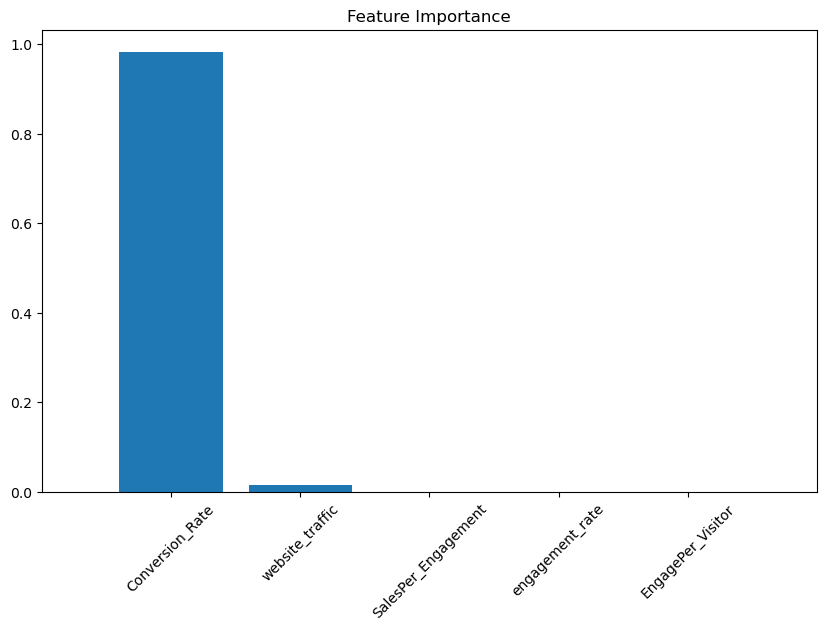

In [148]:
#feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, len(importances)])
    plt.show()
plot_feature_importance(rf, X.columns)

# Linear Regression Model

* Building a linear regression model to forecast sales based on Conversion Rate.

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
# define features and target variable
def define_features_target(df):
    features = ['website_traffic', 'engagement_rate', 'Conversion_Rate', 'EngagePer_Visitor', 'SalesPer_Engagement']
    target = 'sales_forecast'
    X = df[features]
    y = df[target]
    print("Features and target variable defined successfully.")
    return X, y

X, y = define_features_target(df)

Features and target variable defined successfully.


In [142]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print("Data split into training and testing sets successfully.")
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(X, y)

Data split into training and testing sets successfully.


In [ ]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  What happens if engagement increases by 20%?
scenario = df.iloc[[-1]].copy() 
scenario['Conversion_Rate'] *= 1.2

predicted_sales = model.predict(scenario[X.columns])
print("Predicted Sales if Engagement Increases by 20%:", predicted_sales)


Predicted Sales if Engagement Increases by 20%: [338.98818517]
